# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, PReLU, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/MyDrive/test")

In [4]:
print("Is GPU available:", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Is GPU available: True


# Big

### DSSP big

In [5]:
def load_data(file_path):
  with open(file_path, 'r') as file:
        data = file.read().strip().split()
  return np.array(data, dtype=float)  # Ensure float type for numerical computations

aa_sequences = load_data('big/aa1.dat')
labels = load_data('big/dssp.lab.tag.dat')

psi_features = [load_data(f'big/psi{i+1}.dat.NR') for i in range(20)]

assert all(len(feature) == len(aa_sequences) for feature in psi_features), "All feature files must have the same length as aa_sequences."
assert all(feature.size > 0 for feature in psi_features), "No feature file should be empty."

X = np.stack([aa_sequences] + psi_features, axis=-1)

print("Shape of X:", X.shape)
print("Shape of Labels:", labels.shape)

y = to_categorical(labels)

X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.14, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    Conv1D(256, 17, padding='same', input_shape=(X_train.shape[1], X_train.shape[2])),
    PReLU(),
    Conv1D(128, 16, padding='same'),
    PReLU(),
    Conv1D(64, 15, padding='same'),
    PReLU(),
    Flatten(),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Ensure this matches the number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_dssp_big = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64, verbose=1)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Shape of X: (2518596, 21)
Shape of Labels: (2518596,)
Shape of X_train: (1516194, 21)
Shape of y_train: (1516194, 9)
Epoch 1/10
23691/23691 [==============================] - 155s 6ms/step - loss: 1.4703 - accuracy: 0.4428 - val_loss: 1.4543 - val_accuracy: 0.4495
Epoch 2/10
23691/23691 [==============================] - 136s 6ms/step - loss: 1.4616 - accuracy: 0.4462 - val_loss: 1.4494 - val_accuracy: 0.4510
Epoch 3/10
23691/23691 [==============================] - 136s 6ms/step - loss: 1.4597 - accuracy: 0.4472 - val_loss: 1.4541 - val_accuracy: 0.4453
Epoch 4/10
23691/23691 [==============================] - 145s 6ms/step - loss: 1.4588 - accuracy: 0.4473 - val_loss: 1.4502 - val_accuracy: 0.4485
Epoch 5/10
23691/23691 [==============================] - 144s 6ms/step - loss: 1.4579 - accuracy: 0.4477 - val_loss: 1.4490 - val_accuracy: 0.4515
Epoch 6/10
23691/23691 [==============================] - 145s 6ms/step - loss: 1.4575 - accuracy: 0.4476 - val_loss: 1.4497 - val_accuracy: 0.

### SSP big

In [6]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    return np.array(data, dtype=float)

aa_sequences = load_data('big/aa1.dat')
labels = load_data('big/ssp.lab.tag.dat')

psi_features = [load_data(f'big/psi{i+1}.dat.NR') for i in range(20)]

assert all(len(feature) == len(aa_sequences) for feature in psi_features), "All feature files must have the same length as aa_sequences."
assert all(feature.size > 0 for feature in psi_features), "No feature file should be empty."

X = np.stack([aa_sequences] + psi_features, axis=-1)

print("Shape of X:", X.shape)
print("Shape of Labels:", labels.shape)

y = to_categorical(labels)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    Conv1D(256, 17, padding='same', input_shape=(X_train.shape[1], X_train.shape[2])),
    PReLU(),
    Conv1D(128, 16, padding='same'),
    PReLU(),
    Conv1D(64, 15, padding='same'),
    PReLU(),
    Flatten(),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Ensure this matches the number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_ssp_big = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64, verbose=1)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Shape of X: (2518596, 21)
Shape of Labels: (2518596,)
Epoch 1/10
23691/23691 [==============================] - 137s 6ms/step - loss: 1.4701 - accuracy: 0.4426 - val_loss: 1.4537 - val_accuracy: 0.4497
Epoch 2/10
23691/23691 [==============================] - 137s 6ms/step - loss: 1.4613 - accuracy: 0.4463 - val_loss: 1.4504 - val_accuracy: 0.4492
Epoch 3/10
23691/23691 [==============================] - 136s 6ms/step - loss: 1.4595 - accuracy: 0.4469 - val_loss: 1.4509 - val_accuracy: 0.4508
Epoch 4/10
23691/23691 [==============================] - 146s 6ms/step - loss: 1.4588 - accuracy: 0.4472 - val_loss: 1.4481 - val_accuracy: 0.4525
Epoch 5/10
23691/23691 [==============================] - 135s 6ms/step - loss: 1.4581 - accuracy: 0.4476 - val_loss: 1.4599 - val_accuracy: 0.4465
Epoch 6/10
23691/23691 [==============================] - 147s 6ms/step - loss: 1.4572 - accuracy: 0.4478 - val_loss: 1.4491 - val_accuracy: 0.4490
Epoch 7/10
23691/23691 [==============================] - 

# Small

### DSSP small

In [7]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    return np.array(data, dtype=float)

aa_sequences = load_data('small/aa1.dat')
labels = load_data('small/dssp.lab.tag.dat')

psi_features = [load_data(f'small/psi{i+1}.dat.NR') for i in range(24)]

assert all(len(feature) == len(aa_sequences) for feature in psi_features), "All feature files must have the same length as aa_sequences."
assert all(feature.size > 0 for feature in psi_features), "No feature file should be empty."

# Stack features along the last dimension (assuming each feature is already the correct shape to stack)
X = np.stack([aa_sequences] + psi_features, axis=-1)

print("Shape of X:", X.shape)
print("Shape of Labels:", labels.shape)

# Convert labels to one-hot encoding
y = to_categorical(labels)

# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print("Shape of X_train:", X_train.shape)
# print("Shape of y_train:", y_train.shape)

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# # model = Sequential([
# #     Conv1D(256, 17, padding='same', input_shape=(X_train.shape[1], X_train.shape[2])),
# #     PReLU(),
# #     Conv1D(128, 16, padding='same'),
# #     PReLU(),
# #     Conv1D(64, 15, padding='same'),
# #     PReLU(),
# #     Flatten(),
# #     Dropout(0.5),
# #     Dense(y_train.shape[1], activation='softmax')
# # ])

# model = Sequential([
#     Conv1D(256, 17, padding='same', input_shape=(X_train.shape[1], 1)),
#     PReLU(),
#     Conv1D(128, 16, padding='same'),
#     PReLU(),
#     Conv1D(64, 15, padding='same'),
#     PReLU(),
#     Flatten(),
#     Dropout(0.5),
#     Dense(y_train.shape[1], activation='softmax')
# ])

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64, verbose=1)

# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_acc:.4f}")

from sklearn.model_selection import train_test_split

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

# Reshape input data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define and compile the model
model = Sequential([
    Conv1D(256, 17, padding='same', input_shape=(X_train.shape[1], 1)),
    PReLU(),
    Conv1D(128, 16, padding='same'),
    PReLU(),
    Conv1D(64, 15, padding='same'),
    PReLU(),
    Flatten(),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dssp_small = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64, verbose=1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")




Shape of X: (1183318, 25)
Shape of Labels: (1183318,)
Shape of X_train: (757323, 25)
Shape of y_train: (757323, 9)
Shape of X_val: (189331, 25)
Shape of y_val: (189331, 9)
Epoch 1/10
11834/11834 [==============================] - 74s 6ms/step - loss: 1.4234 - accuracy: 0.4651 - val_loss: 1.4073 - val_accuracy: 0.4689
Epoch 2/10
11834/11834 [==============================] - 72s 6ms/step - loss: 1.4073 - accuracy: 0.4714 - val_loss: 1.3940 - val_accuracy: 0.4751
Epoch 3/10
11834/11834 [==============================] - 73s 6ms/step - loss: 1.4034 - accuracy: 0.4729 - val_loss: 1.3965 - val_accuracy: 0.4751
Epoch 4/10
11834/11834 [==============================] - 71s 6ms/step - loss: 1.4011 - accuracy: 0.4740 - val_loss: 1.3940 - val_accuracy: 0.4753
Epoch 5/10
11834/11834 [==============================] - 78s 7ms/step - loss: 1.3993 - accuracy: 0.4752 - val_loss: 1.3944 - val_accuracy: 0.4744
Epoch 6/10
11834/11834 [==============================] - 71s 6ms/step - loss: 1.3981 - accur

# SSP small

In [8]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    return np.array(data, dtype=float)  # Ensure float type for numerical computations

aa_sequences = load_data('small/aa1.dat')
labels = load_data('small/ssp.lab.tag.dat')

psi_features = [load_data(f'small/psi{i+1}.dat.NR') for i in range(24)]

assert all(len(feature) == len(aa_sequences) for feature in psi_features), "All feature files must have the same length as aa_sequences."
assert all(feature.size > 0 for feature in psi_features), "No feature file should be empty."

X = np.stack([aa_sequences] + psi_features, axis=-1)

print("Shape of X:", X.shape)
print("Shape of Labels:", labels.shape)

y = to_categorical(labels)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    Conv1D(256, 17, padding='same', input_shape=(X_train.shape[1], X_train.shape[2])),
    PReLU(),
    Conv1D(128, 16, padding='same'),
    PReLU(),
    Conv1D(64, 15, padding='same'),
    PReLU(),
    Flatten(),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_ssp_small = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64, verbose=1)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Shape of X: (1183318, 25)
Shape of Labels: (1183318,)
Epoch 1/10
11834/11834 [==============================] - 74s 6ms/step - loss: 1.4239 - accuracy: 0.4642 - val_loss: 1.4012 - val_accuracy: 0.4712
Epoch 2/10
11834/11834 [==============================] - 70s 6ms/step - loss: 1.4073 - accuracy: 0.4717 - val_loss: 1.3989 - val_accuracy: 0.4713
Epoch 3/10
11834/11834 [==============================] - 69s 6ms/step - loss: 1.4039 - accuracy: 0.4729 - val_loss: 1.4068 - val_accuracy: 0.4718
Epoch 4/10
11834/11834 [==============================] - 72s 6ms/step - loss: 1.4013 - accuracy: 0.4737 - val_loss: 1.4005 - val_accuracy: 0.4720
Epoch 5/10
11834/11834 [==============================] - 70s 6ms/step - loss: 1.3998 - accuracy: 0.4744 - val_loss: 1.4009 - val_accuracy: 0.4736
Epoch 6/10
11834/11834 [==============================] - 69s 6ms/step - loss: 1.3984 - accuracy: 0.4752 - val_loss: 1.3912 - val_accuracy: 0.4759
Epoch 7/10
11834/11834 [==============================] - 69s 6m

### Analyzing Results

In [9]:
def plot_history(history, title):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()




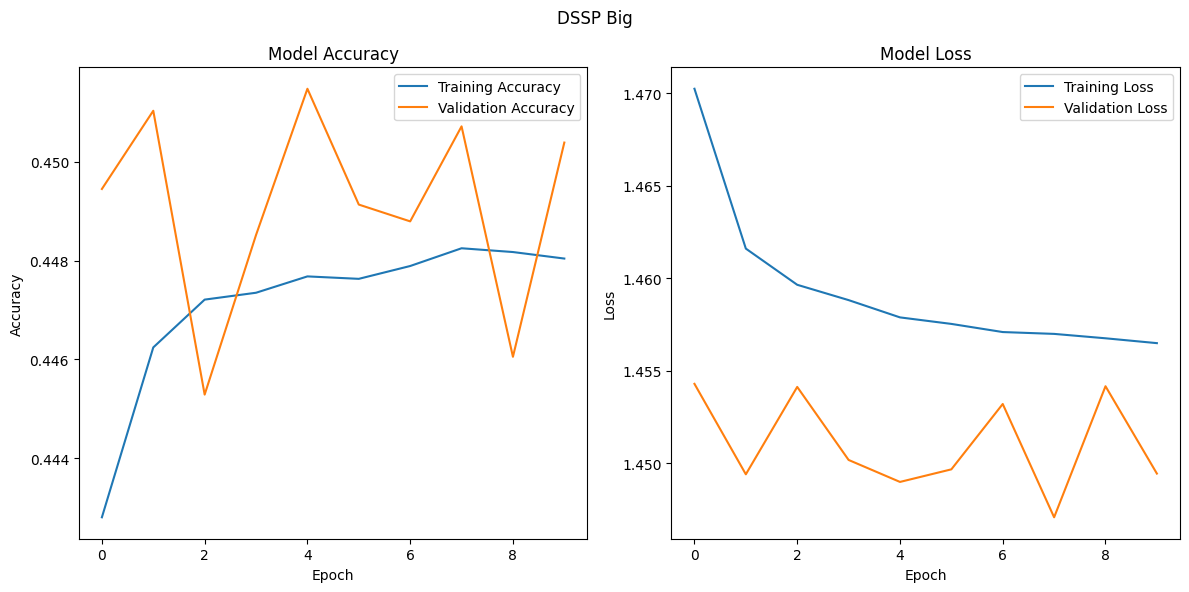

In [10]:
# Plot for DSSP big
plot_history(history_dssp_big, title='DSSP Big')



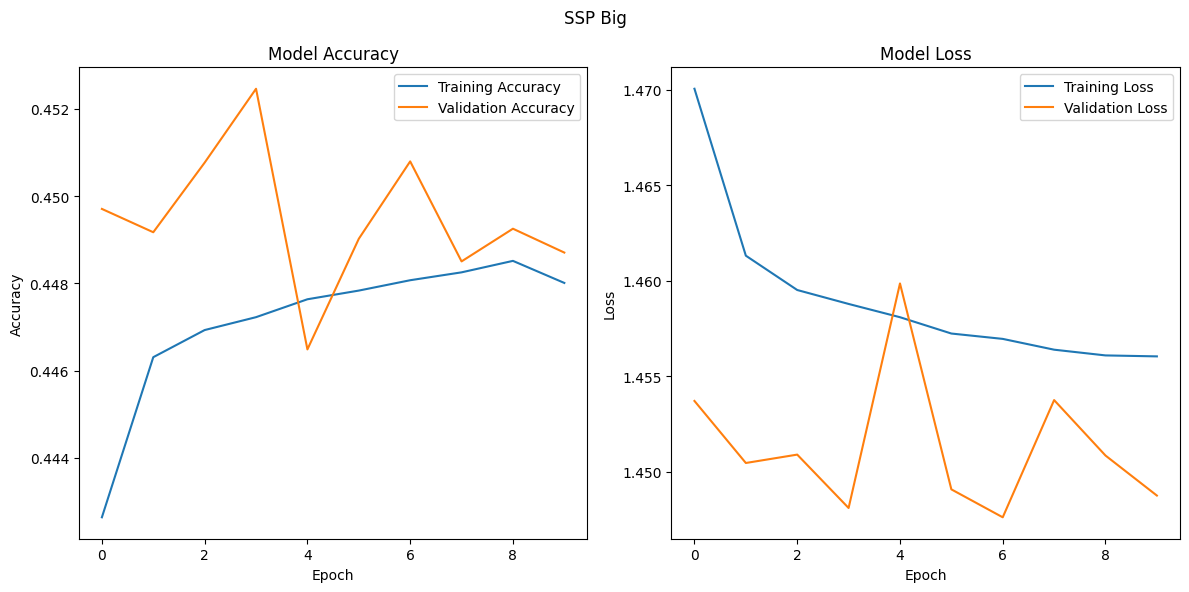

In [11]:
# Plot for SSP big
plot_history(history_ssp_big, title='SSP Big')



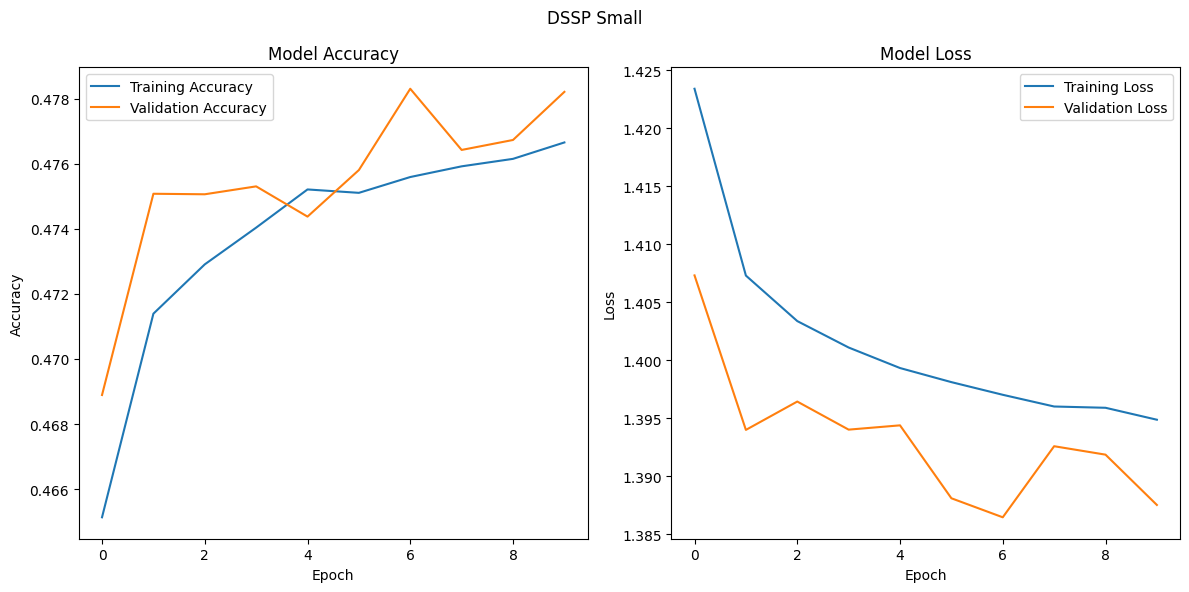

In [12]:
# Plot for DSSP small
plot_history(history_dssp_small, title='DSSP Small')


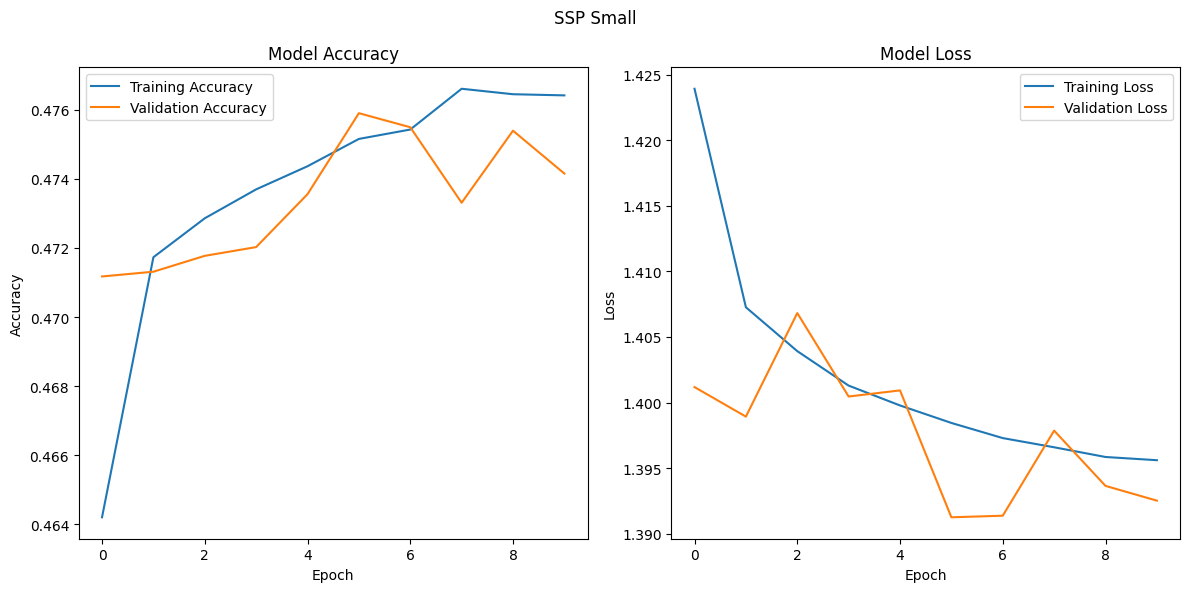

In [13]:

# Plot for SSP small
plot_history(history_ssp_small, title='SSP Small')